In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

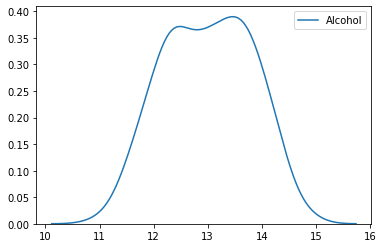

In [3]:
sns.kdeplot(df['Alcohol'])

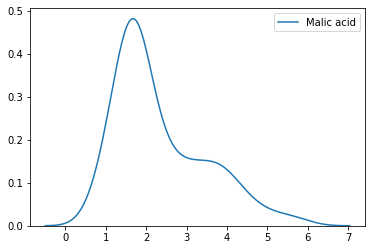

In [5]:
sns.kdeplot(df['Malic acid'])

In [7]:
df.sample(10)

,Class label,Alcohol,Malic acid
26,1,13.39,1.77
65,2,12.37,1.21
59,2,12.37,0.94
93,2,12.29,2.83
15,1,13.63,1.81
126,2,12.43,1.53
146,3,13.88,5.04
73,2,12.99,1.67
142,3,13.52,3.17
102,2,12.34,2.45


In [8]:
df['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

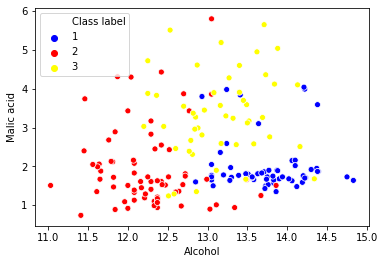

In [14]:
color_dict={1:'blue',2:'red',3:'yellow'}
sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,1:],df['Class label'],test_size=0.3,random_state=0)

In [26]:
x_train.shape

(124, 2)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [30]:
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.transform(x_test)

In [52]:
x_train_scale=pd.DataFrame(x_train_scale,columns=x_train.columns)
x_test_scale=pd.DataFrame(x_test_scale,columns=x_test.columns)

## Plotting the Graphs

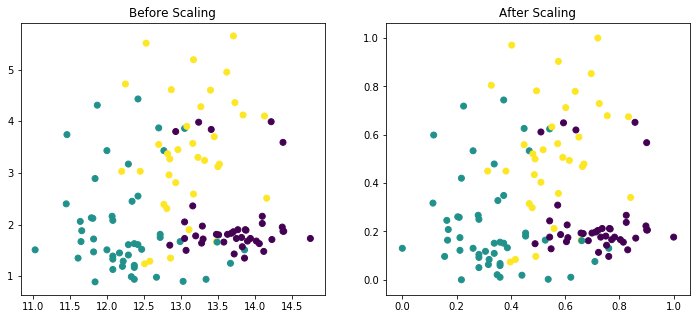

In [53]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['Alcohol'], x_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scale['Alcohol'], x_train_scale['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

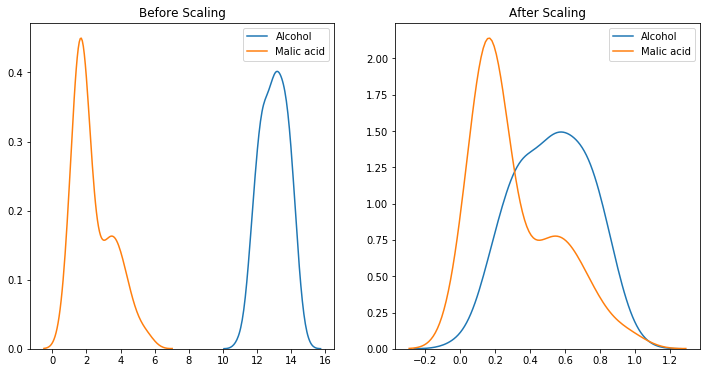

In [68]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,6))
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic acid'],ax=ax1)
ax2.set_title('After Scaling')
sns.kdeplot(x_train_scale['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scale['Malic acid'],ax=ax2)


In [71]:
from sklearn.preprocessing import RobustScaler

In [77]:
scaler=RobustScaler()
x_train_robust=scaler.fit_transform(x_train)
x_test_robust=scaler.transform(x_test)

In [87]:
x_train_robust=pd.DataFrame(x_train_robust,columns=x_train.columns)
x_test_robust=pd.DataFrame(x_test_robust,columns=x_train.columns)

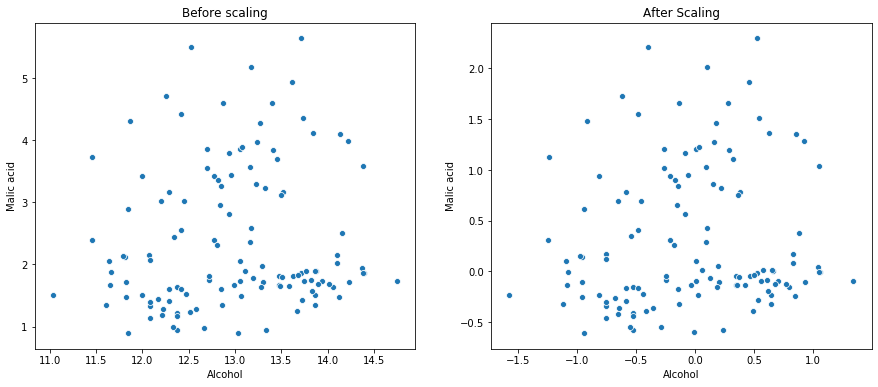

In [95]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(15,6))
ax1.set_title('Before scaling')# when you are using the subplots  then we need to use the set_title
sns.scatterplot(x='Alcohol',y='Malic acid',data=x_train,ax=ax1)
ax2.set_title('After Scaling')
sns.scatterplot(x='Alcohol',y='Malic acid',data=x_train_robust,ax=ax2)



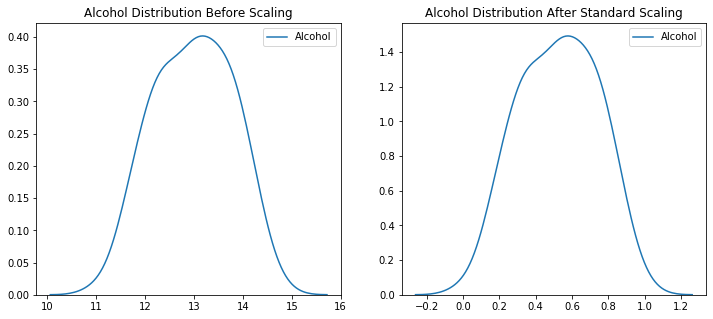

In [97]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(x_train_scale['Alcohol'], ax=ax2)
plt.show()

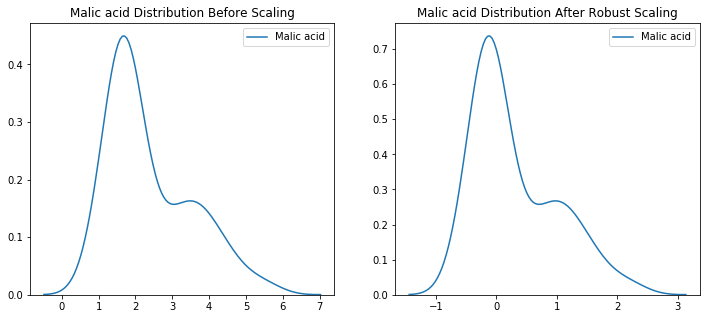

In [100]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(x_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Robust Scaling')
sns.kdeplot(x_train_robust['Malic acid'], ax=ax2)
plt.show()